In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import random as random
from scipy import stats

sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Load Data

In [6]:
milk_data = pd.read_csv('../Data/TheData.csv')
milk_data['DateTime'] = pd.to_datetime(milk_data['DateTime'], errors='coerce')
milk_data['StartTime'] = pd.to_datetime(milk_data['StartTime'], format='%H:%M:%S', errors='coerce').dt.time
milk_data['StartDate'] = pd.to_datetime(milk_data['StartDate'], errors='coerce')
milk_data.head(3)

,FarmName_Pseudo,SE_Number,AnimalNumber,StartDate,StartTime,LactationNumber,DaysInMilk,TotalYield,DateTime,BreedName,Temperature,Relative Humidity,Precipitation,THI_adj,HW,cum_HW
0,a624fb9a,SE-a624fb9a-1425,1425,2022-04-14,17:53:00,1,42.0,7.68,2022-04-14 17:53:00,01 SRB,4.2,86.8,0.0,-836.25624,0,0.0
1,a624fb9a,SE-a624fb9a-1212,1212,2022-04-14,17:45:00,5,192.0,9.58,2022-04-14 17:45:00,02 SLB,4.2,86.8,0.0,-836.25624,0,0.0
2,a624fb9a,SE-a624fb9a-1299,1299,2022-04-14,17:54:00,3,138.0,10.94,2022-04-14 17:54:00,01 SRB,4.2,86.8,0.0,-836.25624,0,0.0


## Select one of the farms

In [12]:
subject_type = 'farm'
farm_id = 'f454e660' #adjust here for specific farm  a624fb9a or f454e660 (Farm 1 and Farm 2)

selected_farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id].copy()

print(f"The daily records dataframe for {farm_id} ({subject_type}) has {selected_farm_data.shape[0]} entries and {selected_farm_data.shape[1]} columns")
selected_farm_data.head()

The daily records dataframe for f454e660 (farm) has 192691 entries and 16 columns


,FarmName_Pseudo,SE_Number,AnimalNumber,StartDate,StartTime,LactationNumber,DaysInMilk,TotalYield,DateTime,BreedName,Temperature,Relative Humidity,Precipitation,THI_adj,HW,cum_HW
178315,f454e660,SE-f454e660-410,410,2022-03-08,18:27:00,3,311.0,9.29,2022-03-08 18:27:00,99 Korsning/obestämbar ras,-0.8,87.6,0.0,-1285.8316,0,0.0
178316,f454e660,SE-f454e660-548,548,2022-03-08,18:25:00,2,165.0,18.30,2022-03-08 18:25:00,01 SRB,-0.8,87.6,0.0,-1285.8316,0,0.0
178317,f454e660,SE-f454e660-467,467,2022-03-08,18:06:00,2,283.0,11.03,2022-03-08 18:06:00,99 Korsning/obestämbar ras,-0.8,87.6,0.0,-1285.8316,0,0.0
178318,f454e660,SE-f454e660-0516,516,2022-03-08,18:33:00,2,91.0,13.72,2022-03-08 18:33:00,04 SJB,-0.8,87.6,0.0,-1285.8316,0,0.0
178319,f454e660,SE-f454e660-455,455,2022-03-08,18:41:00,2,207.0,5.19,2022-03-08 18:41:00,04 SJB,-0.8,87.6,0.0,-1285.8316,0,0.0


## Get Summer months for 2022 & 2023

In [5]:
# Filter for summer months in 2022 and 2023
start_date_2022 = pd.Timestamp('2022-05-01')
end_date_2022 = pd.Timestamp('2022-09-30')
start_date_2023 = pd.Timestamp('2023-05-01')
end_date_2023 = pd.Timestamp('2023-09-30')

selected_farm_data = selected_farm_data[((selected_farm_data['StartDate'] >= start_date_2022) & (selected_farm_data['StartDate'] <= end_date_2022)) | 
                               ((selected_farm_data['StartDate'] >= start_date_2023) & (selected_farm_data['StartDate'] <= end_date_2023))]

selected_farm_data.head()

,FarmName_Pseudo,SE_Number,AnimalNumber,StartDate,StartTime,LactationNumber,DaysInMilk,TotalYield,DateTime,BreedName,Temperature,Relative Humidity,Precipitation,THI_adj,HW,cum_HW
178346,f454e660,SE-f454e660-534,534,2022-06-14,18:22:00,1,536.0,7.47,2022-06-14 18:22:00,04 SJB,16.2,65.0,0.0,177.0568,0,0.0
178347,f454e660,SE-f454e660-0652,652,2022-06-14,18:59:00,1,85.0,15.53,2022-06-14 18:59:00,02 SLB,16.2,65.0,0.0,177.0568,0,0.0
178348,f454e660,SE-f454e660-456,456,2022-06-14,18:36:00,3,88.0,28.00,2022-06-14 18:36:00,02 SLB,16.2,65.0,0.0,177.0568,0,0.0
178349,f454e660,SE-f454e660-0460,460,2022-06-14,18:04:00,3,155.0,7.17,2022-06-14 18:04:00,02 SLB,16.2,65.0,0.0,177.0568,0,0.0
178350,f454e660,SE-f454e660-0544,544,2022-06-14,18:35:00,2,210.0,12.13,2022-06-14 18:35:00,02 SLB,16.2,65.0,0.0,177.0568,0,0.0


## Boxplots to visually compare average daily temperature between summer 22 and 23

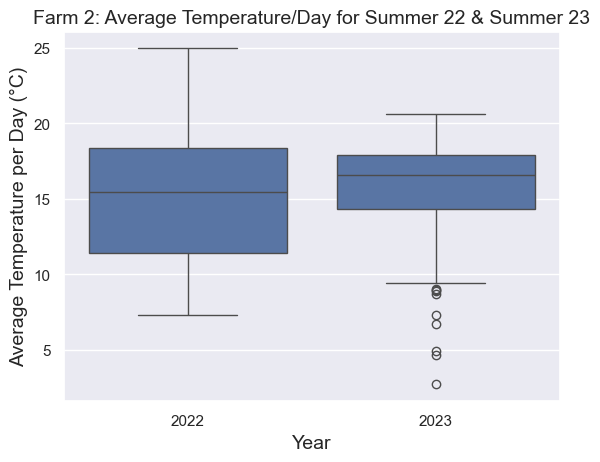

In [9]:
selected_farm_data.sort_values(['AnimalNumber', 'StartDate'], inplace=True)

# Add 'Year' column
selected_farm_data['Year'] = selected_farm_data['StartDate'].dt.year

# Calculate the average temperature per day
average_daily_temperature = selected_farm_data.groupby(['StartDate', 'Year'])['Temperature'].mean().reset_index()

# Plot the boxplot for average daily temperature
sns.boxplot(data=average_daily_temperature, x='Year', y='Temperature')
plt.title('Farm 2: Average Temperature/Day for Summer 22 & Summer 23', fontsize=14) # Change between the farm names
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature per Day (°C)', fontsize=14)
plt.show()

## Boxplots to visually compare Average daily yield for summer 22 and 23

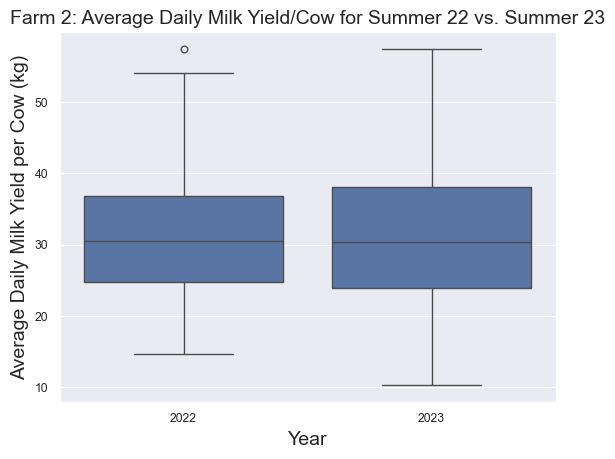

,FarmName_Pseudo,SE_Number,AnimalNumber,StartDate,StartTime,LactationNumber,DaysInMilk,TotalYield,DateTime,BreedName,Temperature,Relative Humidity,Precipitation,THI_adj,HW,cum_HW,Year,DailyTotalYield
200067,f454e660,SE-f454e660-31,31,2022-05-01,17:59:00,7,250.0,3.97,2022-05-01 17:59:00,01 SRB,10.4,44.2,0.0,-119.13008,0,0.0,2022,16.51
221076,f454e660,SE-f454e660-31,31,2022-05-01,10:18:00,7,250.0,12.54,2022-05-01 10:18:00,01 SRB,11.3,42.0,0.0,-72.16820,0,0.0,2022,16.51
207229,f454e660,SE-f454e660-31,31,2022-05-02,18:04:00,7,251.0,6.86,2022-05-02 18:04:00,01 SRB,9.3,65.8,0.0,-285.33124,0,0.0,2022,15.73
225394,f454e660,SE-f454e660-31,31,2022-05-02,08:30:00,7,251.0,8.87,2022-05-02 08:30:00,01 SRB,10.3,58.9,0.0,-189.79848,0,0.0,2022,15.73
197744,f454e660,SE-f454e660-31,31,2022-05-03,09:52:00,7,252.0,13.56,2022-05-03 09:52:00,01 SRB,7.6,47.3,0.0,-269.09596,0,0.0,2022,19.78


In [10]:
# Calculate the total yield for each cow each day
selected_farm_data['DailyTotalYield'] = selected_farm_data.groupby(['AnimalNumber', 'StartDate'])['TotalYield'].transform('sum')
# Aggregate data to daily level per cow
daily_per_cow_data = selected_farm_data.groupby(['Year', 'AnimalNumber']).agg({'DailyTotalYield': 'mean'}).reset_index()

# Plot the boxplot for average daily total yield
sns.set_theme()
sns.set_context("paper")
sns.boxplot(data=daily_per_cow_data, x='Year', y='DailyTotalYield')
plt.title('Farm 2: Average Daily Milk Yield/Cow for Summer 22 vs. Summer 23', fontsize=14) # Change between the farm names
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Daily Milk Yield per Cow (kg)', fontsize=14)
plt.show()
selected_farm_data.head()

### Boxplots to visually compare heatwave and non-heatwave days
And a one-way ANOVA test to asses if there is significant differences in the daily total yield between HW and non-HW

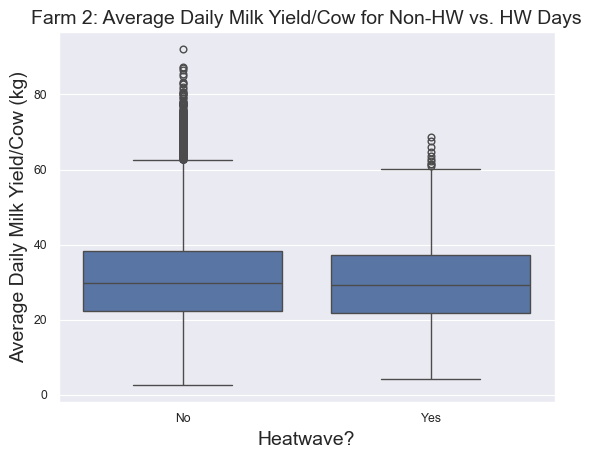

F-statistic: 10.112966745733086, p-value: 0.0014734874264956974


In [11]:
# Re-attempt the grouping and aggregation
average_daily_yield_hw = selected_farm_data.groupby(['StartDate', 'AnimalNumber']).agg({
    'DailyTotalYield': 'mean',
    'HW': 'max'
}).reset_index()

# Map the 'HW' column to strings for visualization
average_daily_yield_hw['HW'] = average_daily_yield_hw['HW'].map({0: 'No', 1: 'Yes'})

# Now create the boxplot to compare the TotalYield during heatwave and non-heatwave days

sns.boxplot(x='HW', y='DailyTotalYield', data=average_daily_yield_hw)

# Set plot labels and title
plt.title('Farm 2: Average Daily Milk Yield/Cow for Non-HW vs. HW Days', fontsize=14) # Change between the farm names
plt.xlabel('Heatwave?', fontsize=14)
plt.ylabel('Average Daily Milk Yield/Cow (kg)', fontsize=14)

# Show the plot
plt.show()

# ANOVA test
anova_results = stats.f_oneway(
    average_daily_yield_hw[average_daily_yield_hw['HW'] == 'No']['DailyTotalYield'],
    average_daily_yield_hw[average_daily_yield_hw['HW'] == 'Yes']['DailyTotalYield']
)

# Print the F-statistic and the p-value
print(f"F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}")


| Farm              | F-statistics | p-value |
| :---------------- | :------: | ----: |
| *Farm 1*        |   $1.3130837814814613$   | $0.25184698089863644$ |
| *Farm 2*          |   $10.112966745733086$   | $0.0014734874264956974$ |
